In [15]:
# Importing the necessary Libraries
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Loading the dataset
file_path = 'diabetes-2.csv'
data = pd.read_csv(file_path)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [17]:
# checking the datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
# checking null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
# Feature scaling
scaler = StandardScaler()
features = data.drop('Outcome', axis=1)
scaled_features = scaler.fit_transform(features)

In [20]:
# Data Summary
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [21]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
# Checking the count of the outcome variable
outcome_counts = data['Outcome'].value_counts()
print(outcome_counts)

Outcome
0    500
1    268
Name: count, dtype: int64


In [25]:
from imblearn.over_sampling import SMOTE


In [26]:
# Applying SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(scaled_features, data['Outcome'])

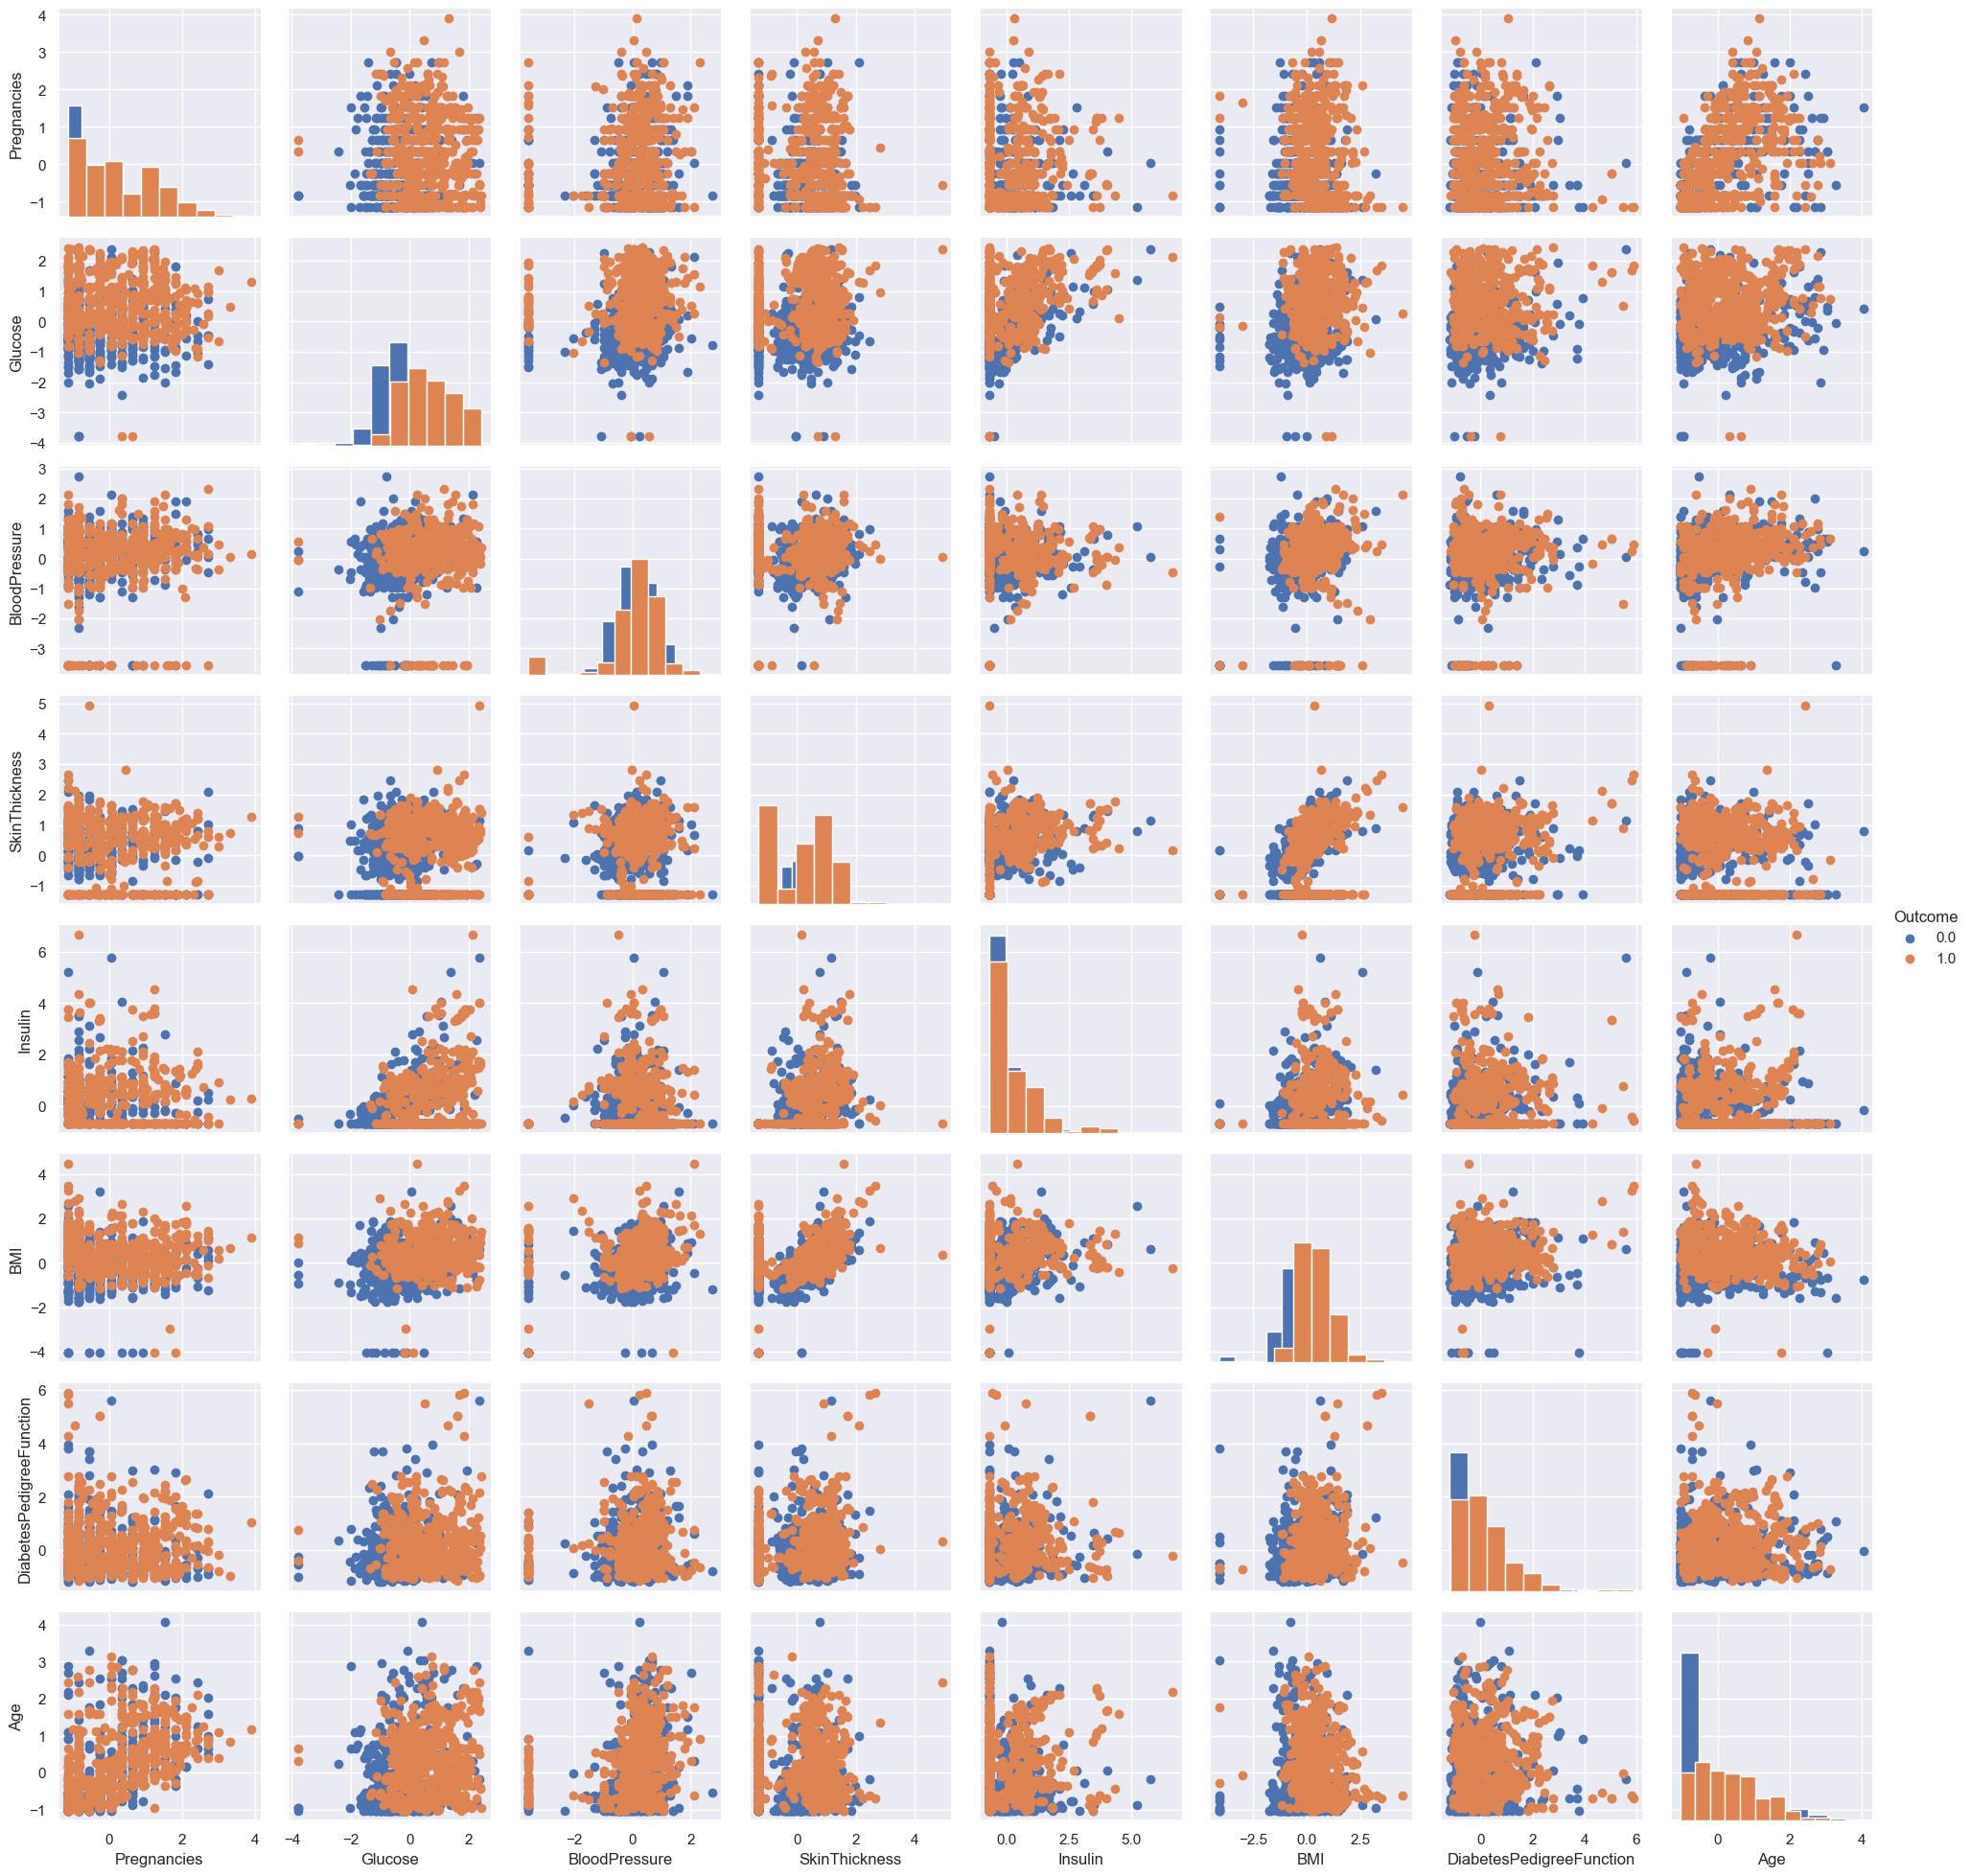

In [ ]:
# Scatterplot matrix with PairGrid
sns.set(style="darkgrid")
g = sns.PairGrid(pd.DataFrame(np.hstack((X_res, y_res[:, np.newaxis])), columns=data.columns), hue='Outcome')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

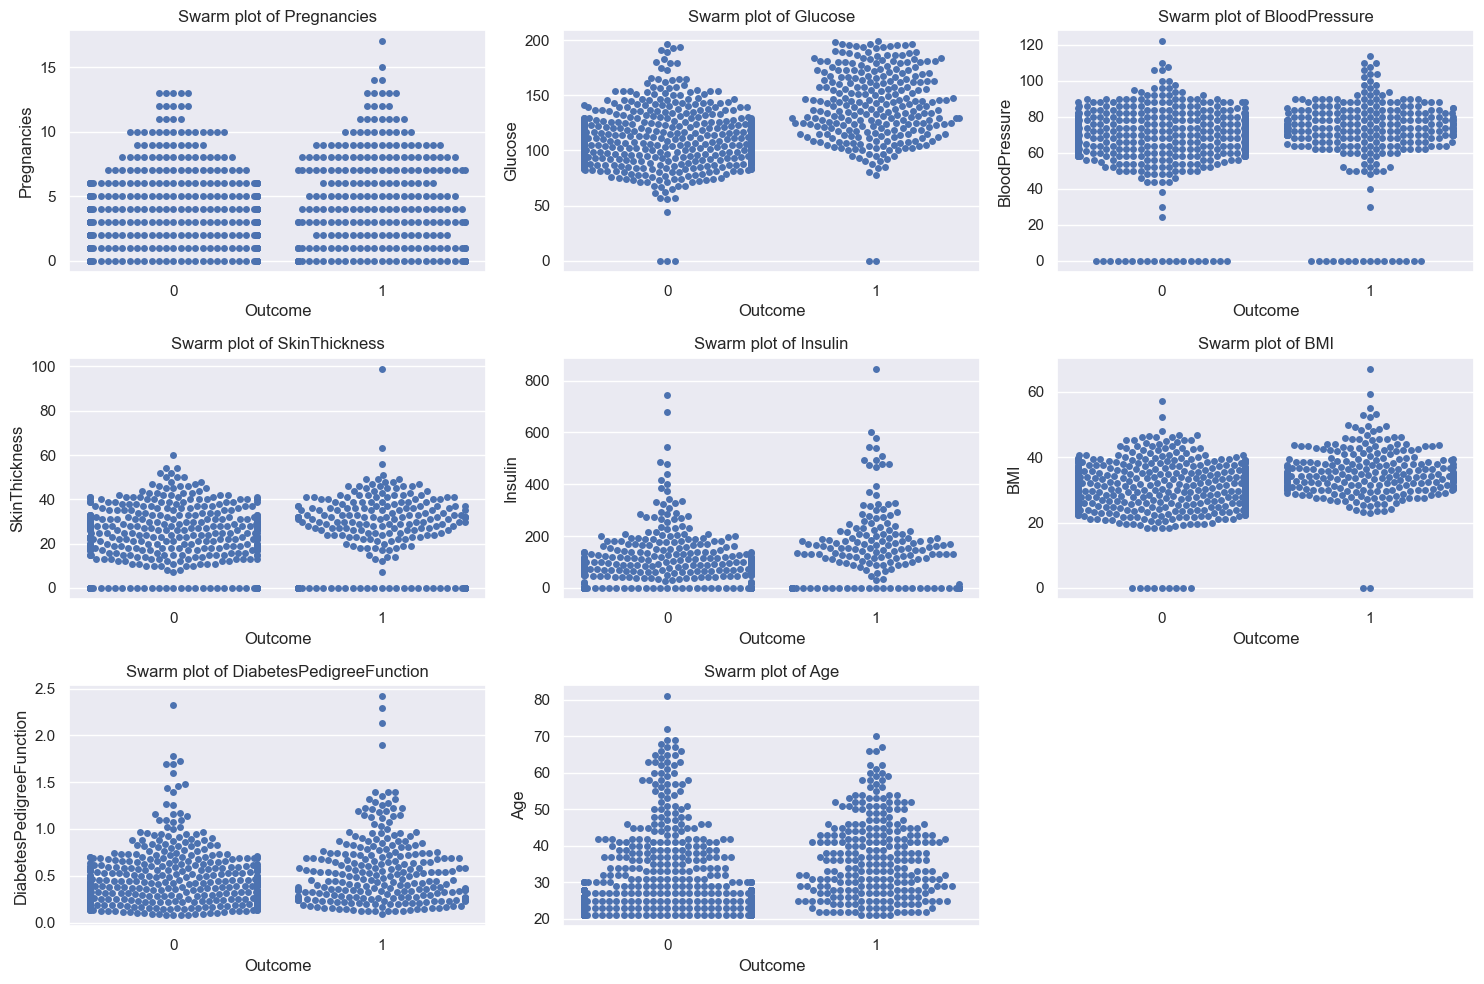

In [ ]:
# Swarm plot for each feature
plt.figure(figsize=(15, 10))
sns.set(style="darkgrid")
for i, column in enumerate(data.drop(columns='Outcome').columns):
    plt.subplot(3, 3, i + 1)
    sns.swarmplot(x='Outcome', y=column, data=data)
    plt.title(f'Swarm plot of {column}')
plt.tight_layout()
plt.show()


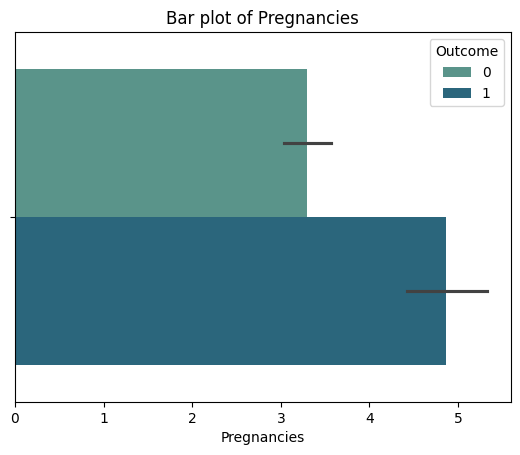

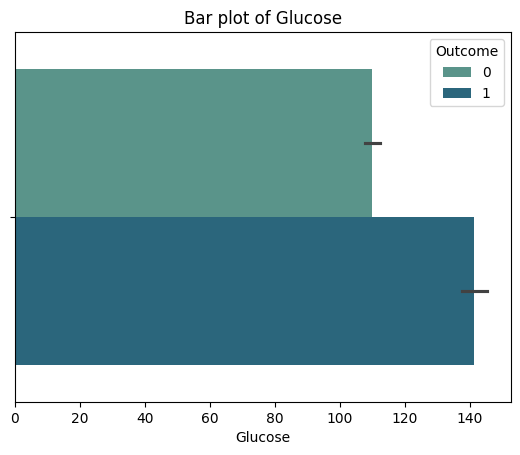

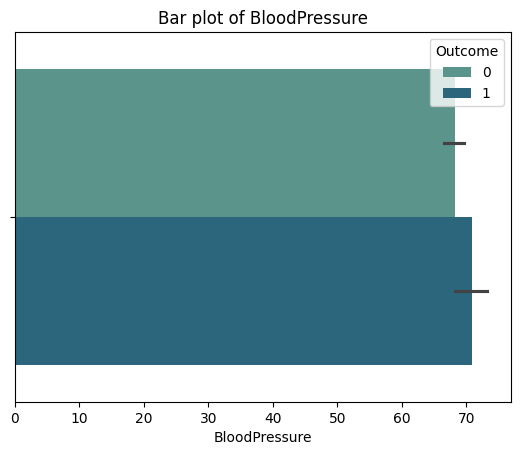

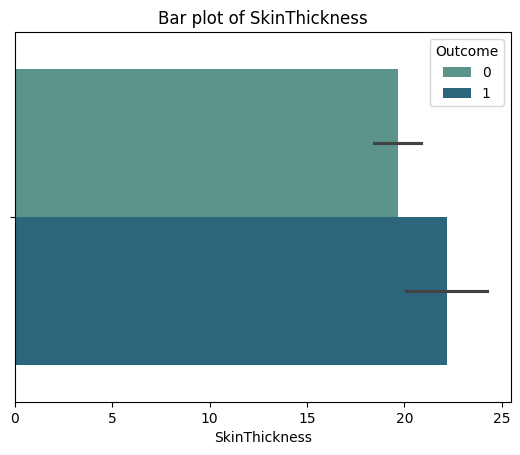

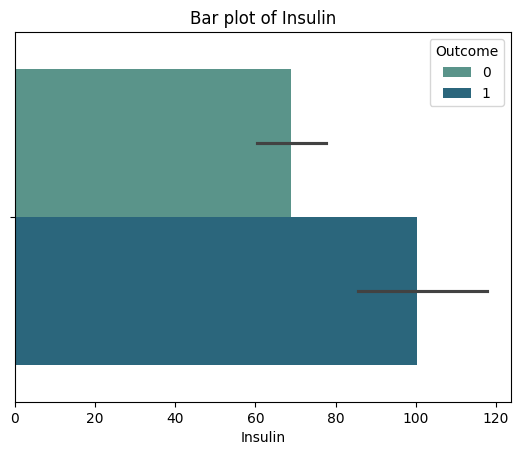

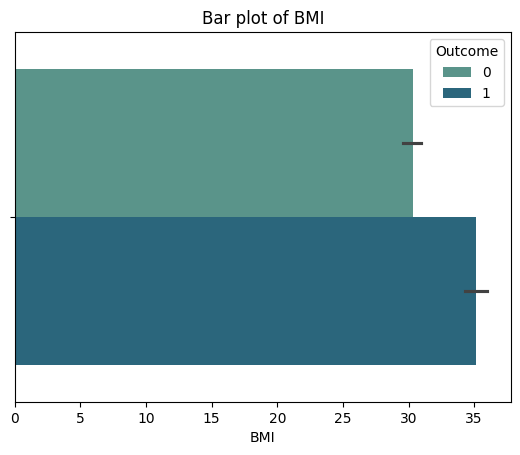

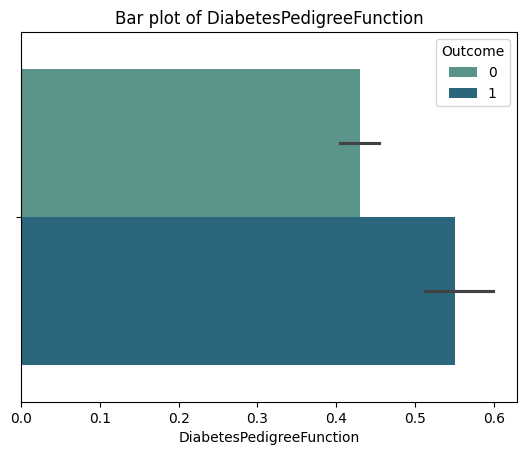

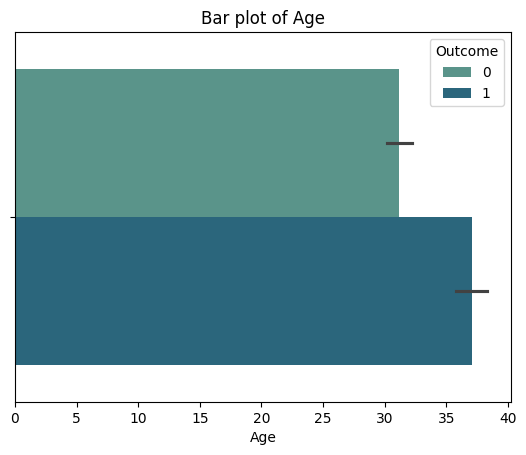

In [ ]:
# Ridge plot for each feature
for column in data.columns[:-1]:
    sns.barplot(data=data, x=column, hue='Outcome', palette="crest")
    plt.title(f'Bar plot of {column}')
    plt.show()

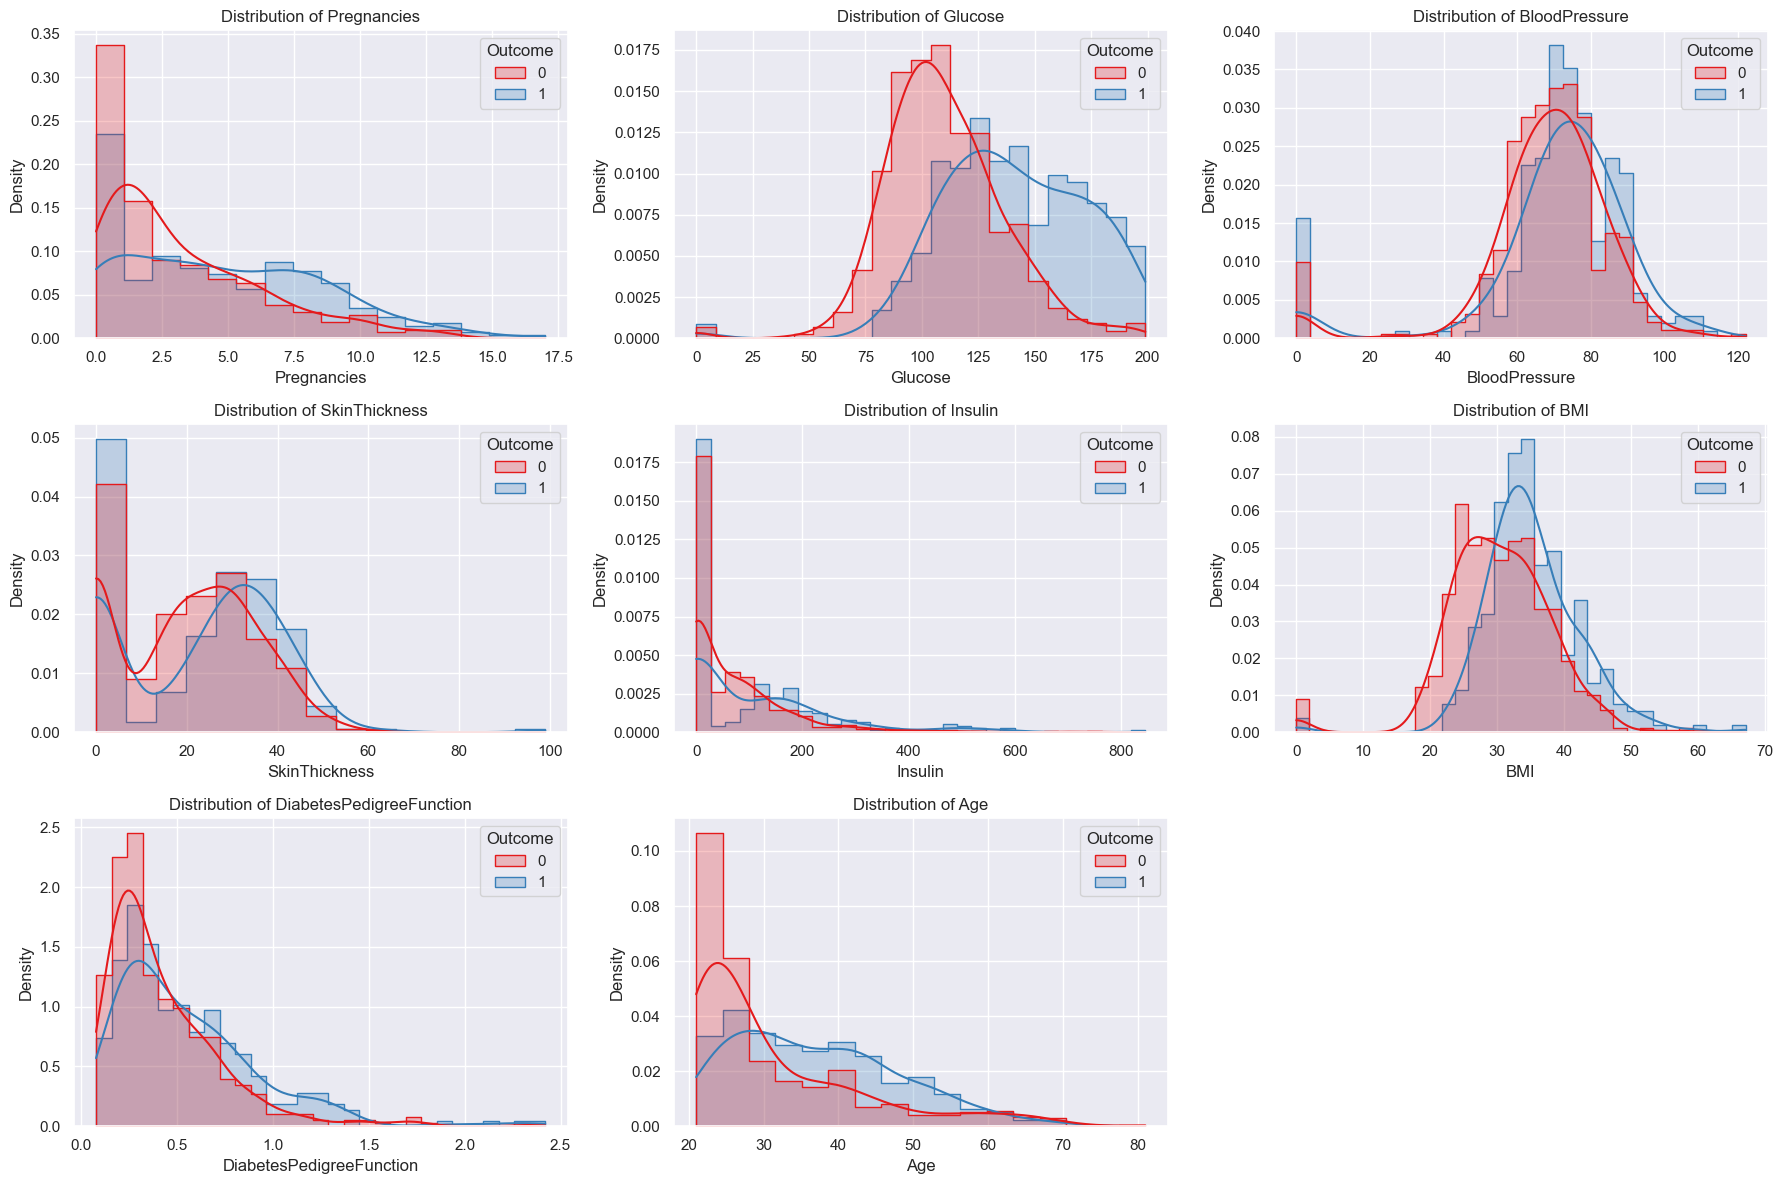

In [ ]:
# Distribution of features with Outcome
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
plt.figure(figsize=(18, 12))
for index, column in enumerate(columns):
    plt.subplot(3, 3, index + 1)
    sns.histplot(data=data, x=column, hue='Outcome', element='step', stat='density', common_norm=False, kde=True, palette='Set1')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

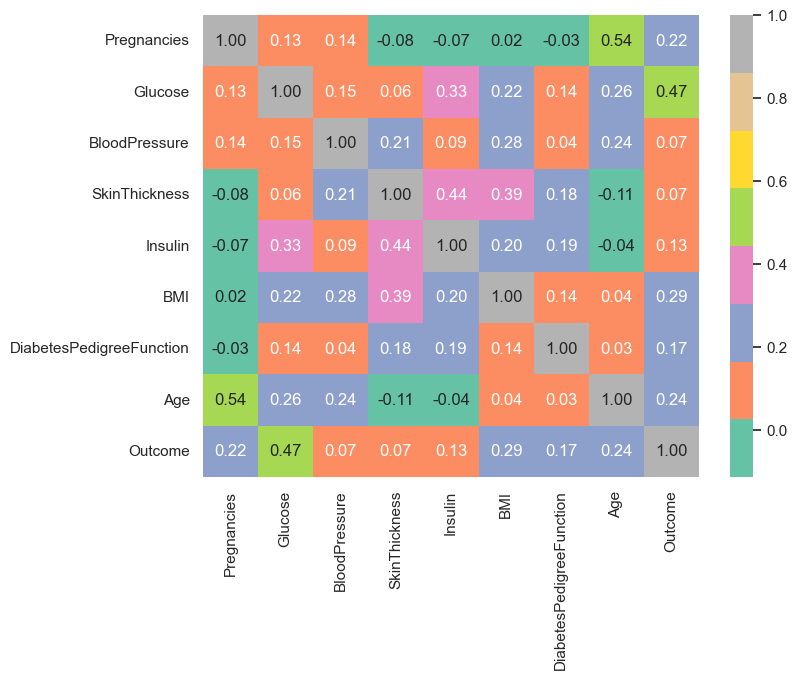

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='Set2')
plt.show()

In [27]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

In [28]:
# Model initialization
models = {
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

# Hyperparameters for GridSearchCV
param_grids = {
    'Extra Trees': {
        'n_estimators': [50, 100, 200],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.001],
        'kernel': ['linear', 'rbf']
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1, 10]
    }
}


Training Extra Trees...
Results for Extra Trees:
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.83
Confusion Matrix:
 [[77 23]
 [11 89]]
Classification Report:
               precision    recall  f1-score   support

Non-Diabetic       0.88      0.77      0.82       100
    Diabetic       0.79      0.89      0.84       100

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



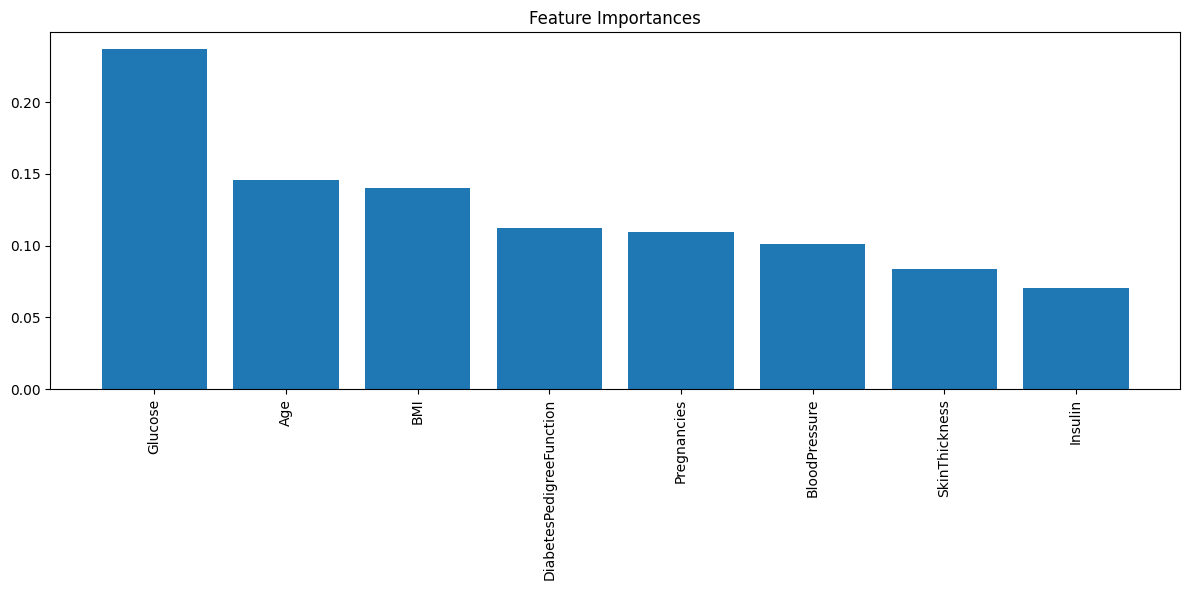


Training SVM...
Results for SVM:
Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Accuracy: 0.82
Confusion Matrix:
 [[76 24]
 [12 88]]
Classification Report:
               precision    recall  f1-score   support

Non-Diabetic       0.86      0.76      0.81       100
    Diabetic       0.79      0.88      0.83       100

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200


Training AdaBoost...
Results for AdaBoost:
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy: 0.78
Confusion Matrix:
 [[73 27]
 [17 83]]
Classification Report:
               precision    recall  f1-score   support

Non-Diabetic       0.81      0.73      0.77       100
    Diabetic       0.75      0.83      0.79       100

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       20

In [29]:
# Training and evaluating the models
for name, model in models.items():
    print(f"\nTraining {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic'])

    # Printing the results
    print(f"Results for {name}:")
    print("Best Parameters:", grid_search.best_params_)
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)

    if name == 'Extra Trees':
        # Feature importance for Extra Trees
        importances = best_model.feature_importances_
        indices = np.argsort(importances)[::-1]
        plt.figure(figsize=(12, 6))
        plt.title("Feature Importances")
        plt.bar(range(X_train.shape[1]), importances[indices], align="center")
        plt.xticks(range(X_train.shape[1]), [data.columns[i] for i in indices], rotation=90)
        plt.tight_layout()
        plt.show()